# PyLCM

In [ ]:
# Uncomment and run the line below if running in Google Colab (https://colab.research.google.com/github/zrowland885/PyLCM_edu/blob/main/PyLCM_edu.ipynb)

# !git clone https://github.com/zrowland885/PyLCM_edu.git
# %cd PyLCM_edu/

## Util functions

In [1]:
import numpy as np

def create_results_dict(
        input
    ):
    """ Returns results as a dictionary, to make it easier to compare between runs. """

    nt, dt, time_array, T_parcel_array, P_parcel_array, RH_parcel_array, q_parcel_array, z_parcel_array, \
    qa_ts, qc_ts, qr_ts, na_ts, nc_ts, nr_ts, \
    spectra_arr, con_ts, act_ts, evp_ts, dea_ts, acc_ts, aut_ts, precip_ts, particles_array, \
    rc_liq_avg_array, rc_liq_std_array, TAU_ts_array, albedo_array = input

    results = {
        'nt': nt, 'dt': dt, 'time': time_array, 'T_parcel': T_parcel_array, 'P_parcel': P_parcel_array, 'RH_parcel': RH_parcel_array, 'q_parcel': q_parcel_array, 'z_parcel': z_parcel_array,
        'qa': qa_ts, 'qc': qc_ts, 'qr': qr_ts, 'na': na_ts, 'nc': nc_ts, 'nr': nr_ts,
        'spectra': spectra_arr, 'con': con_ts, 'act': act_ts, 'evp': evp_ts, 'dea': dea_ts, 'acc': acc_ts, 'aut': aut_ts, 'precip': precip_ts, 'particles': particles_array,
        'rc_liq_avg': rc_liq_avg_array, 'rc_liq_std': rc_liq_std_array, 'tau': TAU_ts_array, 'albedo': albedo_array
    }
    
    return results


def extract_widget_inputs(
        n_particles_widget, P_widget, RH_widget, T_widget, w_widget, nt_widget, dt_widget, rm_spec, ascending_mode_widget, mode_displaytype_widget, z_widget, max_z_widget,
        Condensation_widget, Collision_widget, mode_aero_init_widget, gridwidget, kohler_widget, hygroscopicity_widget, switch_sedi_removal_widget,
        entrainment_rate_widget, entrainment_widget, entrainment_start_widget, entrainment_end_widget
        ):
    """ Convert widget input parameters to raw values to input to model. """
    
    # Model steering parameters
    dt = dt_widget.value
    nt = nt_widget.value

    do_condensation = Condensation_widget.value
    do_collision    = Collision_widget.value

    n_particles = n_particles_widget.value

    # Parcel initial parameters
    T_parcel   = T_widget.value
    P_parcel   = P_widget.value
    RH_parcel  = RH_widget.value
    w_parcel   = w_widget.value
    z_parcel   = z_widget.value

    max_z = max_z_widget.value

    ascending_mode  = ascending_mode_widget.value

    display_mode    = mode_displaytype_widget.value
    
    # Aerosol initialization
    mode_aero_init = mode_aero_init_widget.value

    # Read in the variables given above taking into account unit factors
    N_aero     = [gridwidget[1, 0].value*1.0E6, gridwidget[1, 1].value*1.0E6, gridwidget[1, 2].value*1.0E6, gridwidget[1, 3].value*1.0E6]
    mu_aero    = [gridwidget[2, 0].value*1.0E-6, gridwidget[2, 1].value*1.0E-6, gridwidget[2, 2].value*1.0E-6, gridwidget[2, 3].value*1.0E-6]
    sigma_aero = [gridwidget[3, 0].value, gridwidget[3, 1].value, gridwidget[3, 2].value, gridwidget[3, 3].value]
    k_aero     = [gridwidget[4, 0].value, gridwidget[4, 1].value, gridwidget[4, 2].value, gridwidget[4, 3].value]

    kohler_activation_radius    = kohler_widget.value
    switch_kappa_koehler        = hygroscopicity_widget.value
    switch_sedi_removal         = switch_sedi_removal_widget.value
    entrainment_rate            = entrainment_rate_widget.value
    switch_entrainment          = entrainment_widget.value
    entrainment_start           = entrainment_start_widget.value
    entrainment_end             = entrainment_end_widget.value

    return \
        dt, nt, do_condensation, do_collision, n_particles, \
        T_parcel, P_parcel, RH_parcel, w_parcel, z_parcel, max_z, \
        rm_spec, ascending_mode, display_mode, \
        mode_aero_init, N_aero, mu_aero, sigma_aero, k_aero, \
        kohler_activation_radius, switch_kappa_koehler, switch_sedi_removal, \
        entrainment_rate, switch_entrainment, entrainment_start, entrainment_end

## Setup model

In [2]:
# Import necessary modules
from PyLCM.animation import *
from PyLCM.widget import *
from PyLCM.timestep_routine import *
from PyLCM.parameters import *
# Import user modifiable modules
from Post_process.analysis import *
from Post_process.print_plot import *

# Uncomment lines below when changing source files
#######################
%load_ext autoreload
%autoreload 2
#######################

## User interface (initialise model with widgets)

You can use the user interface widgets below to initialise the model, if you find it more intuitive than the direct input.

### Model steering parameters

In [3]:
dt_widget, nt_widget, Condensation_widget, Collision_widget, switch_sedi_removal_widget, n_particles_widget, max_z_widget = model_steering_input()

'Model steering parameters'

BoundedFloatText(value=1.0, description='dt (s):', max=5.0, min=0.0001, style=DescriptionStyle(description_wid…

IntText(value=5000, description='nt:', style=DescriptionStyle(description_width='initial'))

Checkbox(value=True, description='Condensation', style=CheckboxStyle(description_width='initial'))

Checkbox(value=True, description='Collision', style=CheckboxStyle(description_width='initial'))

BoundedIntText(value=500, description='n_particles:', max=10000, min=100, style=DescriptionStyle(description_w…

BoundedFloatText(value=1200.0, description='z_max (m):', max=10000.0, step=0.1, style=DescriptionStyle(descrip…

### Parcel parameters

In [4]:
T_widget, P_widget, RH_widget, w_widget, z_widget = parcel_info_input()

ascending_mode_widget = ascending_mode_input()

'Parcel initial parameters: '

BoundedFloatText(value=289.27, description='T (K):', max=320.0, min=200.0, step=0.1, style=DescriptionStyle(de…

BoundedFloatText(value=101181.0, description='P (Pa):', max=105000.0, min=95000.0, step=1.0, style=Description…

BoundedFloatText(value=0.83, description='RH (-):', max=2.0, min=0.01, step=0.01, style=DescriptionStyle(descr…

BoundedFloatText(value=0.5, description='w (m/s):', max=10.0, step=0.1, style=DescriptionStyle(description_wid…

BoundedFloatText(value=0.0, description='z (m):', max=20000.0, step=100.0, style=DescriptionStyle(description_…

ToggleButtons(description='Mode', layout=Layout(width='max-content'), options=('linear', 'sine', 'in_cloud_osc…

### Entrainment parameters

In [5]:
entrainment_widget, stability_widget, entrainment_start_widget, entrainment_end_widget, entrainment_rate_widget  = entrainment_input()

'Entrainment parameters: '

Checkbox(value=False, description='Entrainment', style=CheckboxStyle(description_width='initial'))

ToggleButtons(description='Stability', layout=Layout(width='max-content'), options=('Stable', 'Unstable', 'Neu…

IntText(value=1000, description='Entrainment start time (s)', style=DescriptionStyle(description_width='initia…

IntText(value=1030, description='Entrainment end time (s)', style=DescriptionStyle(description_width='initial'…

FloatText(value=0.05, description='Fractional entrainment rate ($ \\mathrm{m}^{-1} $)', layout=Layout(width='m…

#### Create environment profile for entrainment

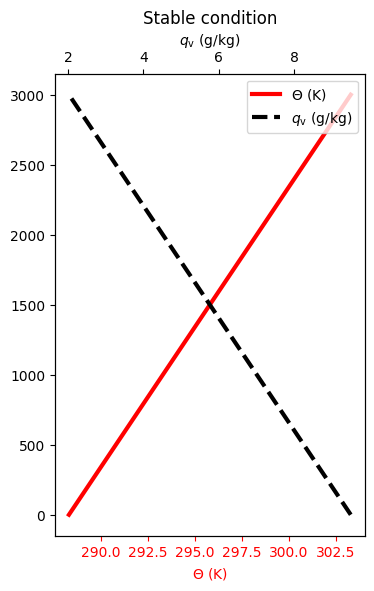

In [6]:
qv_init    = RH_widget.value * esatw( T_widget.value ) / ( P_widget.value - RH_widget.value * esatw( T_widget.value ) ) * r_a / rv
qv_profiles, theta_profiles, z_env = create_env_profiles(T_widget.value, qv_init, z_widget.value,P_widget.value, stability_widget.value)

### Aerosol parameters

In [7]:
#Use activation radius with kohler critical radius
kohler_widget = kohler_settings()
#Use hygroscopicity parameter, otherwise, sea-salt aerosols are initialized 
hygroscopicity_widget = kappa_settings()
#Choose the mode for aerosol initialization
mode_aero_init_widget = aero_mode_input()
# Initialization parameters for aerosol (up to 4 modes)
gridwidget = grid_modes_input()

'Set activation radius using Koehler critical radius, otherwise activation radius is 1 µm'

Checkbox(value=True, description='Koehler critical radius', layout=Layout(width='max-content'), style=Checkbox…

'Use hygroscopicity parameter from kappa-kohler theory'

Checkbox(value=False, description='Hygroscopicity', layout=Layout(width='max-content'), style=CheckboxStyle(de…

'Aerosol initialisation mode: '

ToggleButtons(layout=Layout(width='max-content'), options=('Random', 'Weighting_factor'), value='Random')

N_aero: number of aerosols per cubic centimeter, mu: mean droplet radius, sigma: std of mu


GridspecLayout(children=(Button(button_style='info', description='Mode #1', layout=Layout(grid_area='widget001…

## Timestep routine

In [8]:
# setting of display mode while running: either output of variables in text form (fast, recommended) = 'text'
# or: continuously updated plot using plotly (slow, time & memory consuming) = 'graphics'
mode_displaytype_widget = timestep_display_mode_settings()

'Display mode: '

ToggleButtons(index=1, layout=Layout(width='max-content'), options=('text_fast', 'graphics'), value='graphics'…

## Extract widget inputs

In [9]:
dt, nt, do_condensation, do_collision, n_particles, \
T_parcel, P_parcel, RH_parcel, w_parcel, z_parcel, max_z, \
rm_spec, ascending_mode, display_mode, \
mode_aero_init, N_aero, mu_aero, sigma_aero, k_aero, \
kohler_activation_radius, switch_kappa_koehler, switch_sedi_removal, \
entrainment_rate, switch_entrainment, entrainment_start, entrainment_end = \
extract_widget_inputs(
    n_particles_widget, P_widget, RH_widget, T_widget, w_widget, nt_widget, dt_widget, rm_spec, ascending_mode_widget, mode_displaytype_widget, z_widget, max_z_widget,
    Condensation_widget, Collision_widget, mode_aero_init_widget, gridwidget, kohler_widget, hygroscopicity_widget, switch_sedi_removal_widget,
    entrainment_rate_widget, entrainment_widget, entrainment_start_widget, entrainment_end_widget
)

## Direct input (without widgets)

You can directly assign parameters in the code below rather than using the widgets. This can be more convenient as the widgets will override your original input when reloaded.

If you prefer to use the widget UI above, **do not run the code block directly below this one**. Instead, skip to 'Run model'.

In [10]:
%%capture
# ^ Don't show entrainment plot

# Model steering parameters

dt                  = 1 # s
nt                  = 5000
do_condensation     = True
do_collision        = True
switch_sedi_removal = False
n_particles         = 500
max_z               = 1200 # m


# Parcel initial parameters

T_parcel        = 289.27 # K
P_parcel        = 101181 # Pa
RH_parcel       = 0.83
w_parcel        = 0.5 # m s-1
z_parcel        = 0 # m
ascending_mode  = 'linear' # linear / sine / in_cloud_oscillation


# Entrainment parameters

entrainment         = False
stability           = 'Stable' # Stable / Unstable / Neutral
# entrainment_start   = 1000 # s
# entrainment_end     = 1030 # s
# entrainment_rate    = 0.05

# Even if you are not using entrainment, you need to calculate these
qv_init = RH_parcel * esatw( T_parcel ) / ( P_parcel - RH_parcel * esatw( T_widget.value ) ) * r_a / rv
qv_profiles, theta_profiles, z_env = create_env_profiles(T_parcel, qv_init, z_parcel, P_parcel, stability)


# Koehler theory

kohler_activation_radius    = True
switch_kappa_koehler        = False
mode_aero_init              = 'Random' # Random / Weighting_factor


# Initialisation parameters for aerosol (up to 4 modes)
# N_aero = number of aerosol per cm3 of air | mu = mean droplet radius | sigma = std. of mu | kappa = hygroscopicity parameter

# Mode #1
N_aero[0]       = 200e6 # N_aero (m-3)
mu_aero[0]      = 0.04e-6 # mu (m)
sigma_aero[0]   = 1.4 # sigma (-)
k_aero[0]       = 1.0 # kappa

# Mode #2
N_aero[1]       = 0 # N_aero (m-3)
mu_aero[1]      = 0 # mu (m)
sigma_aero[1]   = 0 # sigma (-)
k_aero[1]       = 0 # kappa

# Mode #3
N_aero[2]       = 0 # N_aero (m-3)
mu_aero[2]      = 0 # mu (m)
sigma_aero[2]   = 0 # sigma (-)
k_aero[2]       = 0 # kappa

# Mode #4
N_aero[3]       = 0 # N_aero (m-3)
mu_aero[3]      = 0 # mu (m)
sigma_aero[3]   = 0 # sigma (-)
k_aero[3]       = 0 # kappa


# Display mode

display_mode = 'text_fast' # text_fast / graphics

## Run model

In [11]:
test_run \
    = create_results_dict(timesteps_function(
        dt, nt, do_condensation, do_collision, n_particles, \
        T_parcel, P_parcel, RH_parcel, w_parcel, z_parcel, max_z, \
        rm_spec, ascending_mode, display_mode, \
        mode_aero_init, N_aero, mu_aero, sigma_aero, k_aero, \
        kohler_activation_radius, switch_kappa_koehler, switch_sedi_removal, \
        entrainment_rate, switch_entrainment, entrainment_start, entrainment_end,
        qv_profiles, theta_profiles
    ))

value: Time (s) z (m)    T (K)    qv (g/kg) RH (%)   QC (g/kg) QR (g/kg) NA (/mg) NC (/mg) NR (/mg) Comp. particles
after: 2400.0    1200.00  281.51   7.91      100.043   1.551     0.039     16.70     100.90    0.50      500     


# Post Processing and Analysis

## List of Outputs

The units refer to the units used in the export output dataset in csv-format (see below). Important: If using the output directly in this notebook there are sometimes different units. These cases are explained below and have to be taken into account when performing exercises.

* `T_parcel_array`: Parcel temperature (K)
* `P_parcel_array`: Parcel pressure (Pa)
* `RH_parcel_array`: Parcel relative humidity (-)
* `q_parcel_array`: Parcel vapor mixing ratio (g/kg) (internal: kg/kg)
* `z_parcel_array`: Parcel height (m)

* `qa_ts`, `qc_ts`, `qr_ts`: Aeorosol, cloud droplet, raindrop mixing ratio (g/kg)  
* `na_ts`, `nc_ts`, `nr_ts`: Aeorosol, cloud droplet, raindrop number concentraion (/mg) (internal: *1e6)

* `con_ts`: Condensation rate (g/kg/s)  
* `evp_ts`: Evaporation rate (g/kg/s) 

* `act_ts`: Aerosol activation rate (g/kg/s) 
* `dea_ts`: Aerosol deactivation rate (g/kg/s) 

* `aut_ts`: Autoconversion rate (g/kg/s)
* `acc_ts`: Accretion rate (g/kg/s) 

* `precip_ts`: Precipitation (g/kg)

* `spectra_arr`: Droplet size distribution (time $\times$ droplet radius bin)

* `r_liq_avg_array`: Mean droplet radius (µm)
* `r_liq_std_array`: Standard deviation of droplet radius (µm)
* `particles_array`: Radii of all droplets with time evolution (radius of particle i $\times$ time)

* The same last three variables exist also for only cloud and rain droplets: `rc_liq_avg_array`, `rc_liq_avg_array`, `particles_c_array`

* `TAU_ts_array`: Optical thickness (-) (Mitchell 2000)
* `albedo_array`: Albedo (-) (Seinfeld and Pandis 2006)

## Plots

Plots can be drawn either as time-series or as vertical profiles.

In [12]:
# user can choice if he wants the plots time-dependent or height-dependent (except of DSD and particle densities always being time dependent)
mode_plots_widget, increment_widget, droplet_mode_widget = plot_widgets_settings(nt)

ToggleButtons(description='Plots are:', layout=Layout(width='max-content'), options=('time-series', 'vertical …

'For droplet spectra: set increment (e.g. 20: every 20th timestep a line is drawn): '

BoundedIntText(value=20, description='For droplet spectra: increment: ', max=5000, min=1, style=DescriptionSty…

ToggleButtons(description='Show only:', index=2, layout=Layout(width='max-content'), options=('Aerosol mode', …

/Users/zrowland/Desktop/repos/PyLCM_edu_branches/PyLCM_edu/Post_process/print_plot.py:26: UserWarning: Log scale: values of z <= 0 have been masked
  contour = ax.contourf(np.arange(nt+1)*dt, 1e6*rm_spec, spectra_arr.T, norm=matplotlib.colors.LogNorm())
/Users/zrowland/Desktop/repos/PyLCM_edu_branches/PyLCM_edu/Post_process/print_plot.py:247: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


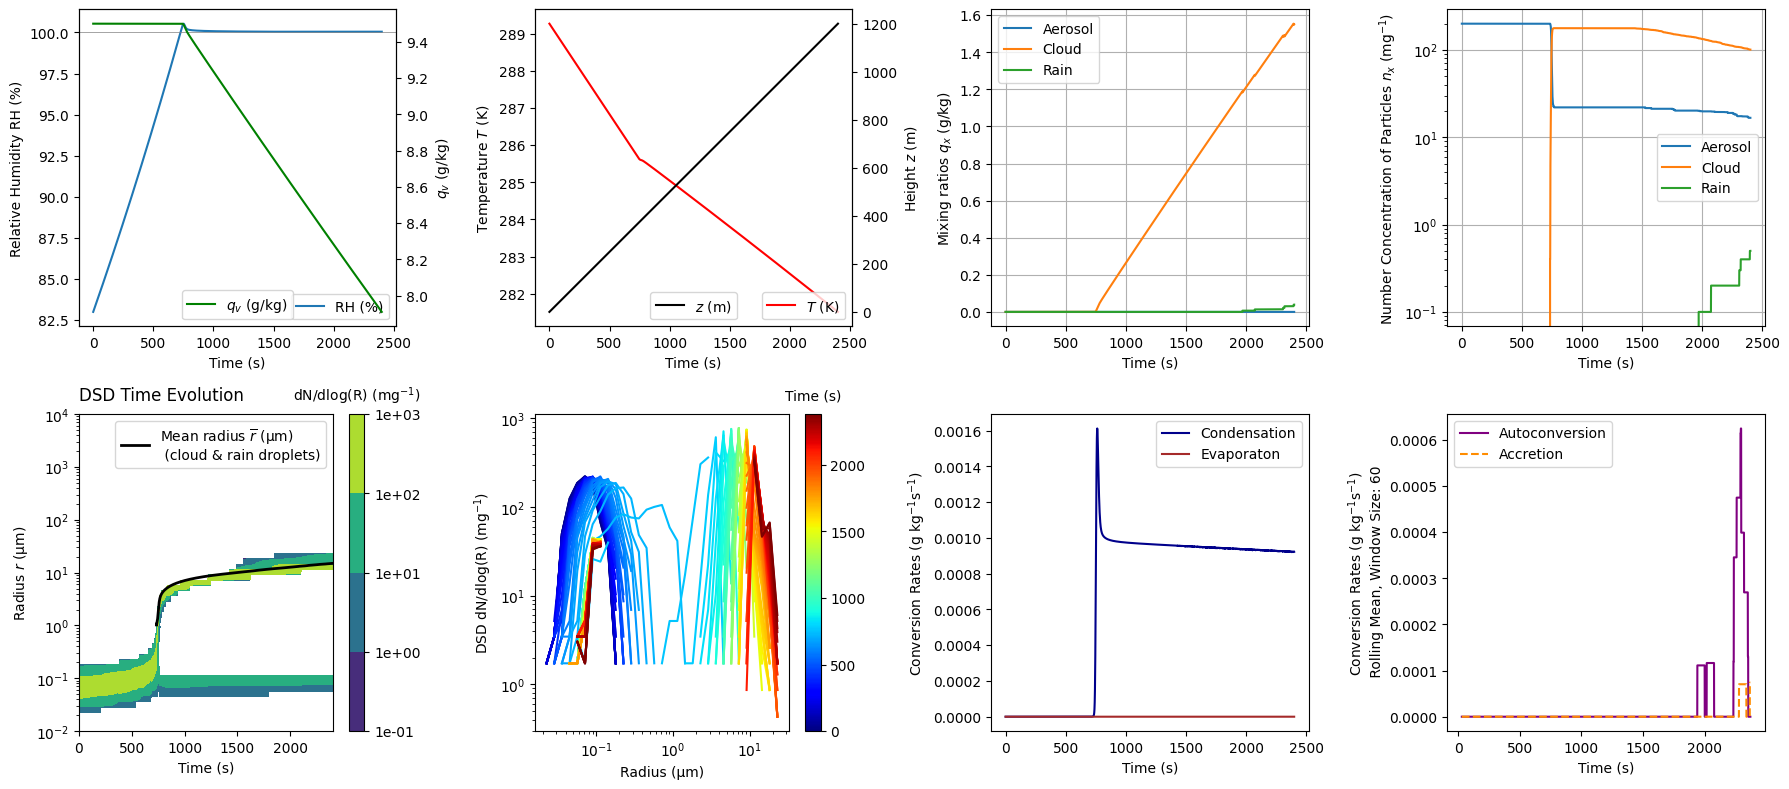

In [13]:
plot_run = test_run

plot_mode = mode_plots_widget.value

subplot_array_function(
    plot_mode, dt, nt, max_z, z_parcel, w_parcel, rm_spec,
    plot_run['qa'], plot_run['qc'], plot_run['qr'],
    plot_run['na'], plot_run['nc'], plot_run['nr'],
    plot_run['T_parcel'], plot_run['RH_parcel'], plot_run['q_parcel'], plot_run['z_parcel'],
    plot_run['spectra'], increment_widget, plot_run['con'], plot_run['act'], plot_run['evp'],
    plot_run['dea'], plot_run['acc'], plot_run['aut'], plot_run['rc_liq_avg'],
    droplet_mode_widget.value
    )

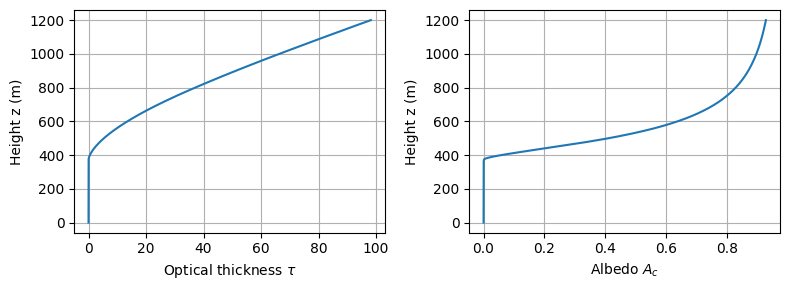

In [14]:
# Tau, albedo plots

fig, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(plot_run['tau'], plot_run['z_parcel'])
ax[1].plot(plot_run['albedo'], plot_run['z_parcel'])

ax[0].set_ylabel('Height z (m)')
ax[1].set_ylabel('Height z (m)')

ax[0].set_xlabel('Optical thickness $τ$')
ax[1].set_xlabel('Albedo $A_c$')

ax[0].grid(); ax[1].grid()

plt.tight_layout()
plt.show()

## data output
options for saving output variables and drop size spectra, files will be written in the subfolder 'output'

In [15]:
file_name_header  = "TEST"

In [16]:
# save array of output variables into csv-file, optional filename can be given as filename='my_filename.csv'
output_run = test_run

save_model_output_variables(output_run['time'], output_run['RH_parcel'], output_run['q_parcel'], output_run['T_parcel'],
                            output_run['z_parcel'], output_run['qa'], output_run['qc'], output_run['qr'],
                            output_run['na'], output_run['nc'], output_run['nr'],
                            output_run['rc_liq_avg'],
                            output_run['tau'], output_run['albedo'],
                            filename=file_name_header + '_testoutput_model.csv')

Output data written to: Output/TEST_testoutput_model.csv


In [17]:
# save array of DSD spectra per timesteps, combined with radii to csv-file
save_model_output_dsd(output_run['spectra'], output_run['time'], rm_spec, rl_spec, rr_spec, nt, filename=file_name_header + '_dsd_array_output.csv')

Output data of droplet size distribution written to: Output/TEST_dsd_array_output.csv
